In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import feature_column
from sklearn.model_selection import train_test_split

In [2]:
heart_attack = pd.read_csv("heart.csv")
o2 = pd.read_csv("o2Saturation.csv")

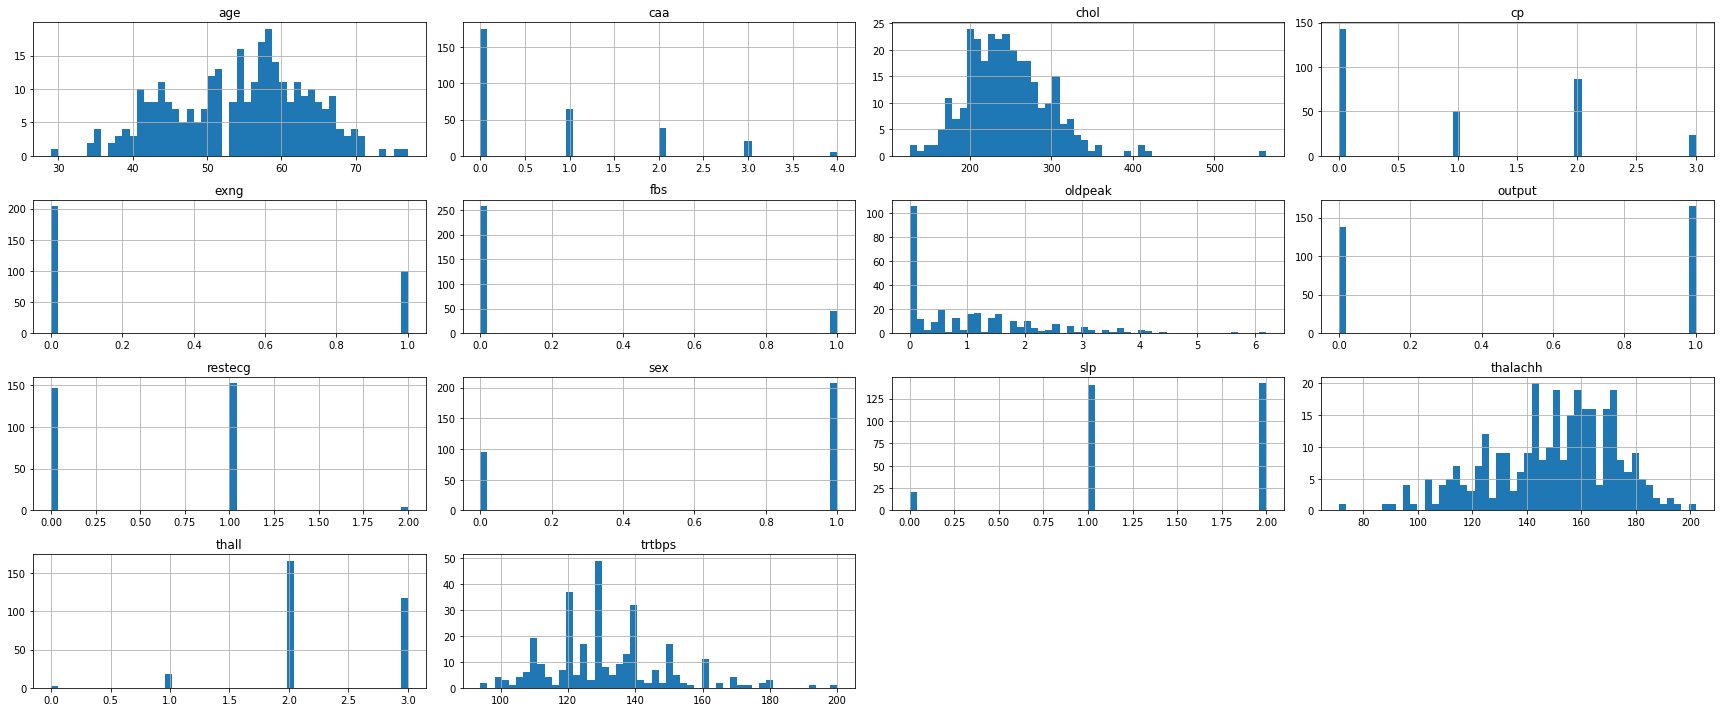

In [3]:
heart_attack.hist(bins = 50, figsize = (24,10))
plt.tight_layout()
plt.show()

In [4]:
#then use train test split
train, test = train_test_split(heart_attack, test_size = 0.2)
train, val = train_test_split(train, test_size = 0.2)

In [5]:
print("train examples:", len(train))
print("validation samples:", len(val))
print("test examples:", len(test))

train examples: 193
validation samples: 49
test examples: 61


In [6]:
#this looks like it is going to make batch sizes
def df_to_dataset(dataframe, shuffle = True, batch_size = 32):
    
    labels = dataframe.copy()
    labels = dataframe.pop('output')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    
    if shuffle:
        ds = ds.shuffle(buffer_size = len(dataframe))
        
    ds = ds.batch(batch_size)
    
    return ds

In [7]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size = batch_size)
test_ds = df_to_dataset(test, shuffle = False, batch_size = batch_size)

In [8]:
train_ds

<BatchDataset shapes: ({age: (None,), sex: (None,), cp: (None,), trtbps: (None,), chol: (None,), fbs: (None,), restecg: (None,), thalachh: (None,), exng: (None,), oldpeak: (None,), slp: (None,), caa: (None,), thall: (None,)}, (None,)), types: ({age: tf.int64, sex: tf.int64, cp: tf.int64, trtbps: tf.int64, chol: tf.int64, fbs: tf.int64, restecg: tf.int64, thalachh: tf.int64, exng: tf.int64, oldpeak: tf.float64, slp: tf.int64, caa: tf.int64, thall: tf.int64}, tf.int64)>

In [10]:
test_ds

<BatchDataset shapes: ({age: (None,), sex: (None,), cp: (None,), trtbps: (None,), chol: (None,), fbs: (None,), restecg: (None,), thalachh: (None,), exng: (None,), oldpeak: (None,), slp: (None,), caa: (None,), thall: (None,)}, (None,)), types: ({age: tf.int64, sex: tf.int64, cp: tf.int64, trtbps: tf.int64, chol: tf.int64, fbs: tf.int64, restecg: tf.int64, thalachh: tf.int64, exng: tf.int64, oldpeak: tf.float64, slp: tf.int64, caa: tf.int64, thall: tf.int64}, tf.int64)>

In [13]:
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2


In [14]:
test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2


In [16]:
val.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1


In [18]:
#make names for categorical vs numerical columns
categorical_columns = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg']
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh']

In [28]:
feature_columns = []

#loop through numerical columns
for header in numerical_columns:
    
    #loop throough and not sure what this does, but it looks like it is making column names
    feature_columns.append(feature_column.numerical_columns(header))
    
#now loop through the categorical column values
for col_name in categorical_columns:
    
    #then make a varaible
    catgeorgical_column = feature_column.categorical_column_with_vocabulary_list(col_name, heart_attack[col_name].unique())
    
    #not sure what this is
    indicator_column = feature_column.indicator_column(categorical_column)
    
    #then append those
    feature_columns.append(indicator_column)

AttributeError: 'list' object has no attribute 'numerical_columns'

In [29]:
#there is some error here